In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import re
from shapely.geometry import Point
from geopandas import GeoDataFrame
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize
from matplotlib import cm

In [2]:
def construct_grid(vent, points_north, points_east, points_south, \
                   points_west, elevation, spacing):
    width = points_west + points_east + 1
    length = points_south + points_north + 1
    
    xx, yy = np.meshgrid(np.linspace(-points_west, points_east, width),\
                         np.linspace(-points_south, points_north, length))
    xx = xx*spacing + vent[0]
    yy = yy*spacing + vent[1]

    xx = xx.ravel()
    yy = yy.ravel()
    zz = [elevation]*len(xx)
    
    d = {'Easting': xx, 'Northing': yy, 'Elev.': zz}
    df = pd.DataFrame(data=d)
    return df

def write_grid_file(df, filename):
    df.to_csv(filename, sep=' ', columns=['Easting', 'Northing', 'Elev.'],
              index=False, header=False)

In [360]:
vent = (0, 0)

N = 20
D = 250
K = 20
dfs = []

for i in range(K):
    dfs.append(construct_grid(vent, 
                         points_east =N, 
                         points_west =N, 
                         points_north=N, 
                         points_south=N, 
                         elevation=1, spacing=i*D))
df = pd.concat(dfs)
df = df.drop_duplicates()

length = (2*N + 1) * D * K
print(length)
print(len(df))

205000
25393


In [359]:
write_grid_file(df, "exploding_grid.utm")

In [357]:
samples = df[["Northing", "Easting"]].T.values
densObj = kde(samples, 1)
def makeColours(vals):
    colours = np.zeros((len(vals),3))
    norm = Normalize(vmin=vals.min(), vmax=vals.max())

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable(norm=norm, cmap='plasma').to_rgba(val) for val in vals]

    return colours

densities = densObj.evaluate(samples)
print(densities)
colours = makeColours(densities)

[6.49039886e-11 6.41644809e-11 6.42002975e-11 ... 3.43269813e-12
 3.01292902e-12 2.61884748e-12]


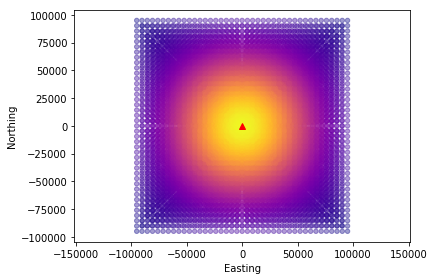

In [358]:
fig = plt.figure()
ax = fig.add_subplot(111)

df.plot.scatter("Easting", "Northing", color=colours, marker='o', s=20, ax=ax, alpha=0.4)
ax.plot(vent[0], vent[1], 'r^')
plt.axis('equal')
plt.tight_layout()
plt.show()

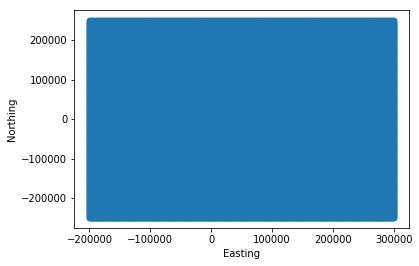

In [7]:
vent = (0, 0)
df = construct_grid(vent, 250, 300, 250, 200, 1, 1000)
df.plot.scatter("Easting", "Northing")

In [8]:
write_grid_file(df, "const_wind_grid.utm")